# Importing The Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Data Collection and Preprocessing

In [2]:
#loading the data from csv fle to pandas dataset
raw_mail_data = pd.read_csv('mail_data.csv')

In [3]:
raw_mail_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
#replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [5]:
# print the first five rows form the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
 # print the last five rows form the dataframe
mail_data.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [7]:
# print the number of rows and columns of the dataframe
mail_data.shape

(5572, 2)

# Label Encoding

In [8]:
# convers ham and spam to binary classification by assignin label
# spam : 0
# ham : 1

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

In [9]:
mail_data

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will ü b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


# Seperating the data as texts and labels

In [10]:
x_data = mail_data['Message']   # texts
y_data = mail_data['Category']  # labels

In [11]:
x_data

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [12]:
y_data

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

# Splitting the data into train_test

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2, random_state=3)

In [14]:
x_train.shape

(4457,)

In [15]:
x_test.shape

(1115,)

In [16]:
y_train.shape

(4457,)

In [17]:
y_test.shape

(1115,)

# Feature Extraction: Converting text values into numerical values

In [18]:
# transform the test data to feature vectors that can be used as input to the Logistic Regression
# TfidfVectorizer: go through all the words and assigns score to them
# min_df: if the score is less than or equal to a specific value we will ignore it
# stop_words: words like 'is','are' which doesn't make sense because they are common, hence will be ignored

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

In [19]:
# fitting all the data into the vectorizer and transfor into the feature vector
x_train_features = feature_extraction.fit_transform(x_train)

# we don't want our model to be aware fo x_testhence only transform
x_test_features = feature_extraction.transform(x_test)

# convert y_train and y_test values as integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [20]:
print(x_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [21]:
print(x_test_features)

  (0, 7271)	0.1940327008179069
  (0, 6920)	0.20571591693537986
  (0, 5373)	0.2365698724638063
  (0, 5213)	0.1988547357502182
  (0, 4386)	0.18353336340308998
  (0, 1549)	0.2646498848307188
  (0, 1405)	0.3176863938914351
  (0, 1361)	0.25132445289897426
  (0, 1082)	0.2451068436245027
  (0, 1041)	0.28016206931555726
  (0, 405)	0.2381316303003606
  (0, 306)	0.23975986557206702
  (0, 20)	0.30668032384591537
  (0, 14)	0.26797874471323896
  (0, 9)	0.2852706805264544
  (0, 1)	0.2381316303003606
  (1, 7368)	0.29957800964520975
  (1, 6732)	0.42473488678029325
  (1, 6588)	0.3298937975962767
  (1, 6507)	0.26731535902873493
  (1, 6214)	0.3621564482127515
  (1, 4729)	0.22965776503163893
  (1, 4418)	0.3457696891316818
  (1, 3491)	0.496093956101028
  (2, 7205)	0.22341717215670331
  :	:
  (1110, 3167)	0.5718357066163949
  (1111, 7353)	0.4991205841293424
  (1111, 6787)	0.40050175714278885
  (1111, 6033)	0.4714849709283488
  (1111, 3227)	0.44384935772735523
  (1111, 2440)	0.4137350055985486
  (1112, 7071)

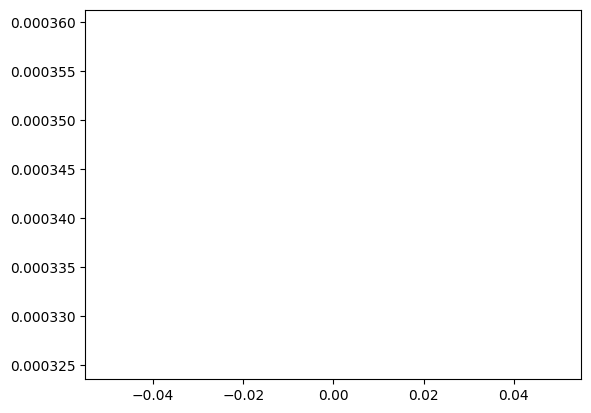

In [22]:
plt.plot(x_train_features.mean())

# Training Model using Logistic Regression

In [23]:
model = LogisticRegression()

In [24]:
# training the logidtic regression model with the training data
model.fit(x_train_features,y_train)

LogisticRegression()

# Evaluating the train model

In [25]:
# prediction on training data
prediction_train_data = model.predict(x_train_features)

In [26]:
# comparing target and evaluated value
accuracy_train_data = accuracy_score(y_train, prediction_train_data)

In [27]:
print("Accuracy :",accuracy_train_data)

Accuracy : 0.9670181736594121


In [28]:
# accuracy score on test_data
prediction_test_data = model.predict(x_test_features)
accuracy_test_data = accuracy_score(y_test, prediction_test_data)
print("Accuracy :",accuracy_test_data)

Accuracy : 0.9659192825112107


# Building a Predictive System

In [49]:
input_mail = ["You have been offered to recieve 500 rupees. call to claim"]

In [50]:
# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

In [51]:
# making prediction
prediction_input = model.predict(input_data_features)

In [52]:
print(prediction_input)

# printing spam or ham
if prediction_input[0] == 1:
    print("Mail: Ham")
else:
    print("Mail: Spam")

[0]
Mail: Spam
